<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK12_EDA_R/blob/main/Week_12_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading relevant packages

In [ ]:
# load data.table package
library("data.table")
# load tidyverse package
library("tidyverse")
# install cutr package from github
devtools::install_github("moodymudskipper/cutr")
# load cutr package
library(cutr)

## Loading the dataset

In [ ]:
# load the dataset using fread funcion and instantiate it
data <- fread('http://bit.ly/IPAdvertisingData')

## Reading the data

In [ ]:
# preview the first few records in the dataset
head(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
# find number of rows and columns in the dataframe using dim() function
dim(data)

[1] 1000   10

There are 1000 rows and 10 columns in the dataframe

In [ ]:
# check the data type of each variable using sapply() function
sapply(data, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "integer"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Male
[1] "integer"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "integer"

"Clicked on Ad" and "Male" are categorical variables even though they have numeric values. Their data types will be changed in the data cleaning section. 

# Data cleaning

In [ ]:
# Standardize column names by lowering the case and replacing the spaces with underscores

# replace the spaces with underscores using gsub() function
names(data) <- gsub(" ","_", names(data))

# lower the case of the column names using tolower() function
names(data) <- tolower(names(data))

# display the column names to confirm the changes
colnames(data)

[1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"

In [ ]:
# find number of duplicated rows using anyDuplicated() function
anyDuplicated(data)

[1] 0

There are no duplicated rows in the dataframe

In [ ]:
# find the number of missing values in each column using is.na() and colSums() functions
colSums(is.na(data))

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                    male                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

There are no missing values in any of the columns

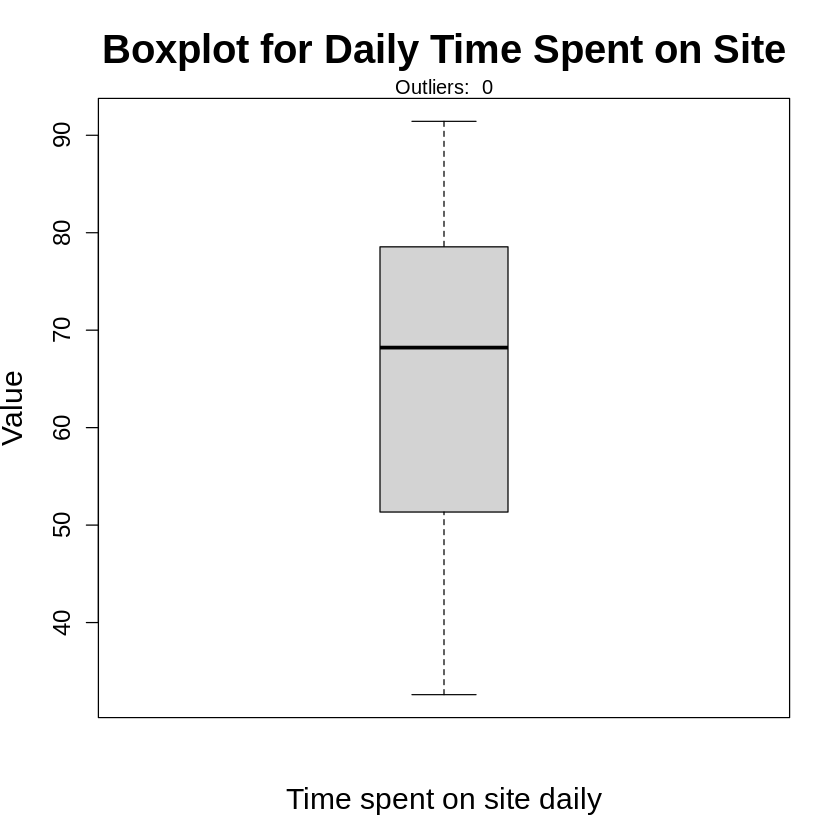

In [ ]:
# plot a boxplot to check for outliers in the 'daily_time_spent_on_site' column
boxplot(data$daily_time_spent_on_site, main="Boxplot for Daily Time Spent on Site", xlab = "Time spent on site daily", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_time_on_site <- boxplot.stats(data$daily_time_spent_on_site)$out
mtext(paste("Outliers: ", paste(length(outlier_time_on_site), collapse=", ")), cex=1)

There are no outliers in the 'daily_time_spent_on_site' column

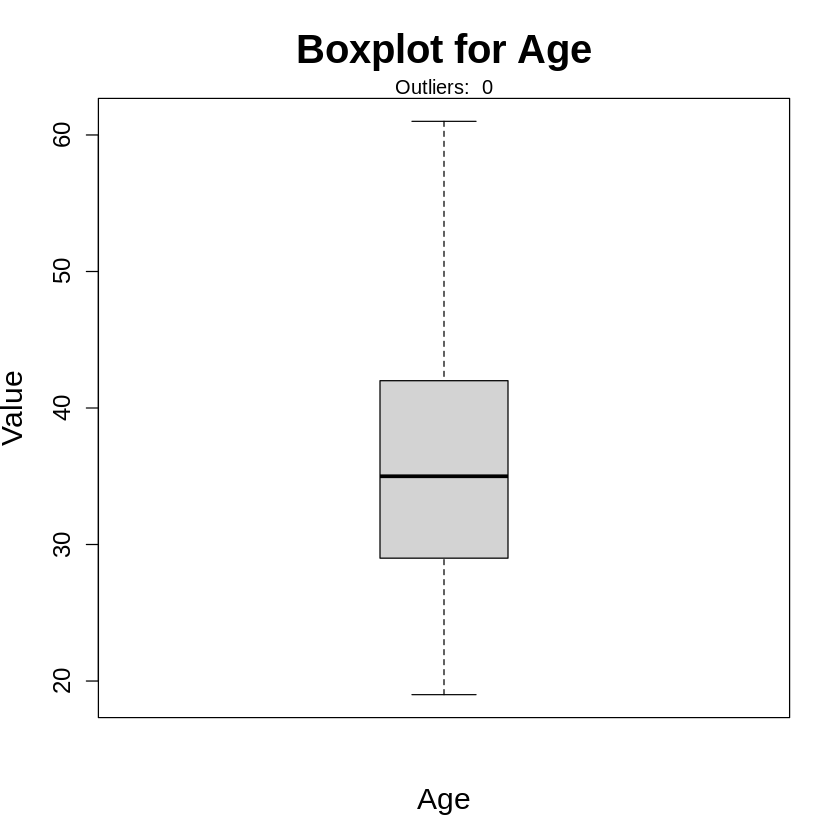

In [ ]:
# plot a boxplot to check for outliers in the 'age' column
boxplot(data$age, main="Boxplot for Age", xlab = "Age", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display number of outlier values in the column
outlier_age <- boxplot.stats(data$age)$out
mtext(paste("Outliers: ", paste(length(outlier_age), collapse=", ")), cex=1)

There are no outliers in the 'age' column

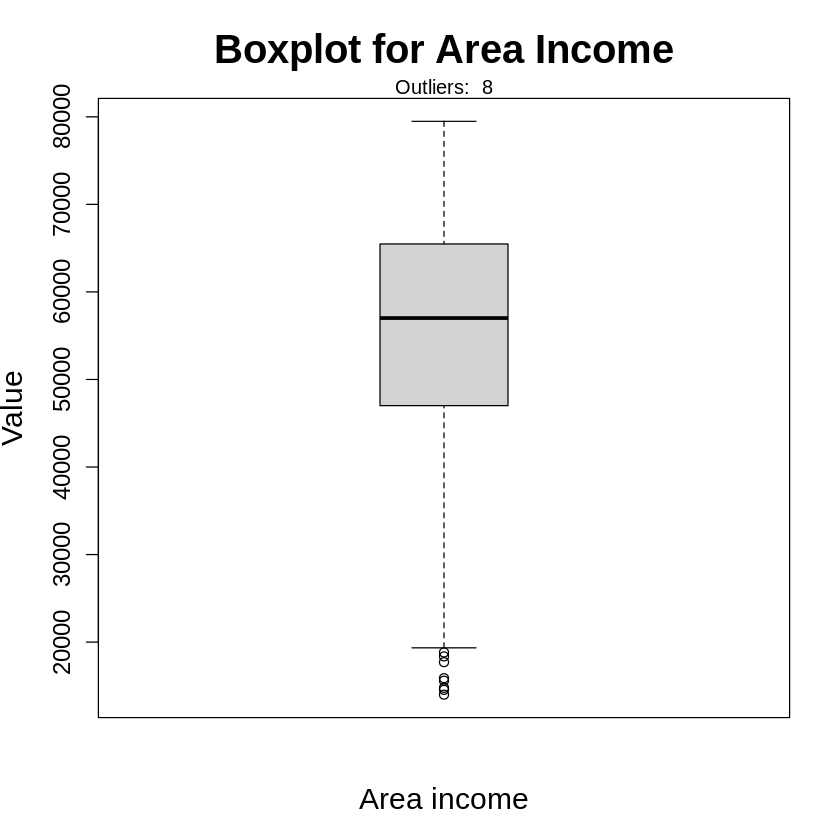

In [ ]:
# plot a boxplot to check for outliers in the 'area_income' column
boxplot(data$area_income, main="Boxplot for Area Income", xlab = "Area income", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_income <- boxplot.stats(data$area_income)$out
mtext(paste("Outliers: ", paste(length(outlier_income), collapse=", ")), cex=1)

Since the outliers in the column represent accurate values, we have no justifiable reason to drop them; for this reason, the outliers will be retained



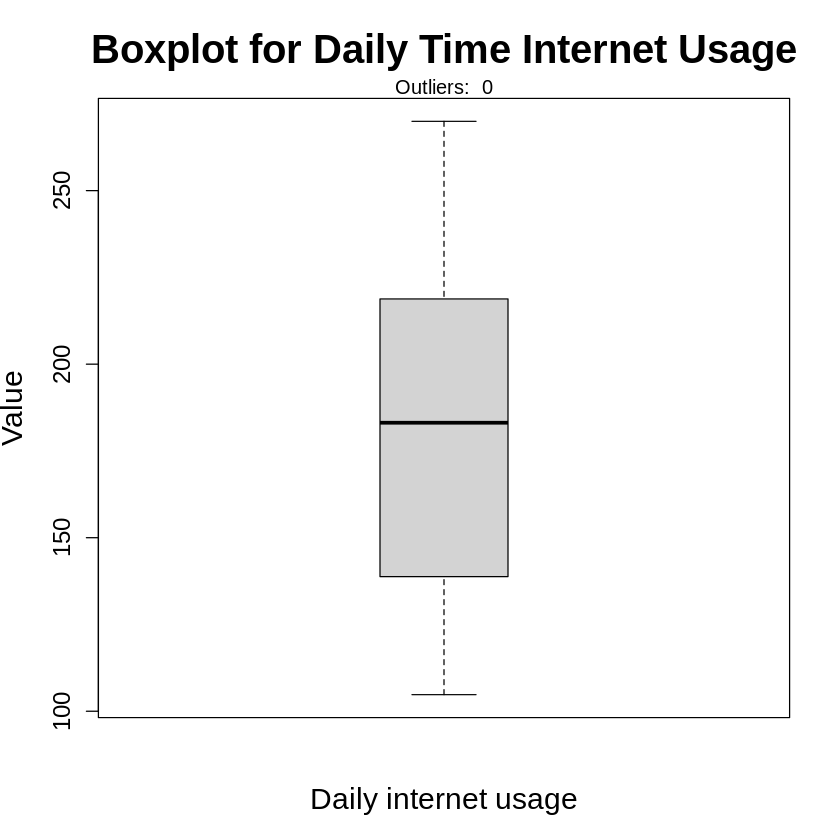

In [ ]:
# plot a boxplot to check for outliers in the 'daily_internet_usage' column
boxplot(data$daily_internet_usage, main="Boxplot for Daily Time Internet Usage", xlab = "Daily internet usage", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the outliers 
outlier_internet_usage <- boxplot.stats(data$daily_internet_usage)$out
mtext(paste("Outliers: ", paste(length(outlier_internet_usage), collapse=", ")), cex=1)

There are no outliers in the 'daily_internet_usage' column

In [ ]:
# check for anomalies in the 'city' column by scrutinizing its unique values 
print(unique(data$city))

  [1] "Wrightburgh"             "West Jodi"              
  [3] "Davidton"                "West Terrifurt"         
  [5] "South Manuel"            "Jamieberg"              
  [7] "Brandonstad"             "Port Jefferybury"       
  [9] "West Colin"              "Ramirezton"             
 [11] "West Brandonton"         "East Theresashire"      
 [13] "West Katiefurt"          "North Tara"             
 [15] "West William"            "New Travistown"         
 [17] "West Dylanberg"          "Pruittmouth"            
 [19] "Jessicastad"             "Millertown"             
 [21] "Port Jacqueline"         "Lake Nicole"            
 [23] "South John"              "Pamelamouth"            
 [25] "Harperborough"           "Port Danielleberg"      
 [27] "West Jeremyside"         "South Cathyfurt"        
 [29] "Palmerside"              "West Guybury"           
 [31] "Phelpschester"           "Lake Melindamouth"      
 [33] "North Richardburgh"      "Port Cassie"            
 [35] "New Tho

There are 969 unique values and no anomalies in the 'city' column

In [ ]:
# check for anomalies in the 'ad_topic_line' column by scrutinizing its unique values 
print(unique(data$ad_topic_line))

   [1] "Cloned 5thgeneration orchestration"                     
   [2] "Monitored national standardization"                     
   [3] "Organic bottom-line service-desk"                       
   [4] "Triple-buffered reciprocal time-frame"                  
   [5] "Robust logistical utilization"                          
   [6] "Sharable client-driven software"                        
   [7] "Enhanced dedicated support"                             
   [8] "Reactive local challenge"                               
   [9] "Configurable coherent function"                         
  [10] "Mandatory homogeneous architecture"                     
  [11] "Centralized neutral neural-net"                         
  [12] "Team-oriented grid-enabled Local Area Network"          
  [13] "Centralized content-based focus group"                  
  [14] "Synergistic fresh-thinking array"                       
  [15] "Grass-roots coherent extranet"                          
  [16] "Persistent demand

There are 1000 unique values and no anomalies in the 'ad_topic_line' column

In [ ]:
# check for anomalies in the 'male' column by scrutinizing its unique values 
print(unique(data$male))

[1] 0 1


There are 2 unique values and no anomalies in the 'male' column

In [ ]:
# rename the 'male' column to 'gender'
names(data)[names(data) == "male"] <- "gender"

# replace the ones and zeros in 'gender' column with 'male' and 'female' using the ifelse() function
data$gender <- ifelse(data$gender == 1,"Male", 'Female')

In [ ]:
# check for anomalies in the 'country' column by scrutinizing its unique values 
print(unique(data$country))

  [1] "Tunisia"                                            
  [2] "Nauru"                                              
  [3] "San Marino"                                         
  [4] "Italy"                                              
  [5] "Iceland"                                            
  [6] "Norway"                                             
  [7] "Myanmar"                                            
  [8] "Australia"                                          
  [9] "Grenada"                                            
 [10] "Ghana"                                              
 [11] "Qatar"                                              
 [12] "Burundi"                                            
 [13] "Egypt"                                              
 [14] "Bosnia and Herzegovina"                             
 [15] "Barbados"                                           
 [16] "Spain"                                              
 [17] "Palestinian Territory"           

There are 237 unique values and no anomalies in the 'country' column

In [ ]:
# check for anomalies in the 'clicked_on_ad' column by scrutinizing its unique values 
print(unique(data$clicked_on_ad))

[1] 0 1


There are 2 unique values and no anomalies in the 'clicked_on_ad' column

In [ ]:
# replace the ones and zeros in 'clicked_on_ad' column with 'yes' and 'no' using the ifelse() function
data$clicked_on_ad <- ifelse(data$clicked == 1,"Yes", 'No')

## Feature engineering

In [ ]:
# extract 'month', 'day' and 'hour' data from 'timestamp' column
data$month <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%m")
data$part_of_month <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%d")
data$part_of_day <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%H")

In [ ]:
# categorize the values in the 'part_of_month' column using ifelse() function 
data$part_of_month <- ifelse(data$part_of_month >='01' & data$part_of_month <= '10' ,"Early",
              ifelse(data$part_of_month >='11' & data$part_of_month <= '20',"Mid", "Late"))

In [ ]:
# categorize the values in the 'part_of_day' column
data$part_of_day <- ifelse(data$part_of_day >='00' & data$part_of_day <= '02' ,"Late night",
              ifelse(data$part_of_day >='03' & data$part_of_day <= '05',"Towards morning",
              ifelse(data$part_of_day >='06' & data$part_of_day <= '08',"Early morning",
              ifelse(data$part_of_day >='09' & data$part_of_day <= '11',"Late morning",
              ifelse(data$part_of_day >='12' & data$part_of_day <= '14',"Early afternoon",
              ifelse(data$part_of_day >='15' & data$part_of_day <= '17',"Late afternoon",
              ifelse(data$part_of_day >='18' & data$part_of_day <= '20',"Evening", "Night")))))))
              

In [ ]:
# add a column that contains binned values of 'area_income'
data$income_range <- smart_cut(data$area_income,
                    c(10001,20000,30000,40000,50000,60000,70000,80000), 
                    labels = ~paste0(.y[1],'-',.y[2]-1), 
                    simplify = FALSE)

In [ ]:
# add a column that contains binned values of 'age'
data$age_bracket <- smart_cut(data$age,
                    c(10,20,30,40,50,60,70), 
                    labels = ~paste0(.y[1],'-',.y[2]-1), 
                    simplify = FALSE)

In [ ]:
# add a column that contains binned values of 'daily_time_spent_on_site'
data$time_on_site_range <- smart_cut(data$daily_time_spent_on_site,
                    c(30,40,50,60,70,80,90,100), 
                    labels = ~paste0(.y[1],'-',.y[2]-1), 
                    simplify = FALSE)

In [ ]:
# add a column that contains binned values of 'daily_time_spent of sit'
data$internet_usage_range <- smart_cut(data$daily_internet_usage,
                    c(100,150,200,250,300), 
                    labels = ~paste0(.y[1],'-',.y[2]-1), 
                    simplify = FALSE)

In [ ]:
# drop irrelevant columns
setDT(data)[, c( "timestamp", "city", "ad_topic_line") := NULL]

Warning message in `[.data.table`(setDT(data), , `:=`(c("timestamp", "city", "ad_topic_line"), :
“Column 'timestamp' does not exist to remove”
Warning message in `[.data.table`(setDT(data), , `:=`(c("timestamp", "city", "ad_topic_line"), :
“Column 'city' does not exist to remove”
Warning message in `[.data.table`(setDT(data), , `:=`(c("timestamp", "city", "ad_topic_line"), :
“Column 'ad_topic_line' does not exist to remove”


In [ ]:
# preview the first few records of the dataset
head(data)

daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,country,clicked_on_ad,month,part_of_month,part_of_day,income_range,age_bracket,time_on_site_range,internet_usage_range
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<ord>,<ord>,<ord>,<ord>
68.95,35,61833.90,256.09,Female,Tunisia,No,03,Late,Late night,60000-69999,30-39,60-69,250-299
80.23,31,68441.85,193.77,Male,Nauru,No,04,Early,Late night,60000-69999,30-39,80-89,150-199
69.47,26,59785.94,236.50,Female,San Marino,No,03,Mid,Evening,50000-59999,20-29,60-69,200-249
74.15,29,54806.18,245.89,Male,Italy,No,01,Early,Late night,50000-59999,20-29,70-79,200-249
68.37,35,73889.99,225.58,Female,Iceland,No,06,Early,Towards morning,70000-79999,30-39,60-69,200-249
59.99,23,59761.56,226.74,Male,Norway,No,05,Mid,Early afternoon,50000-59999,20-29,50-59,200-249


## Univariate analysis

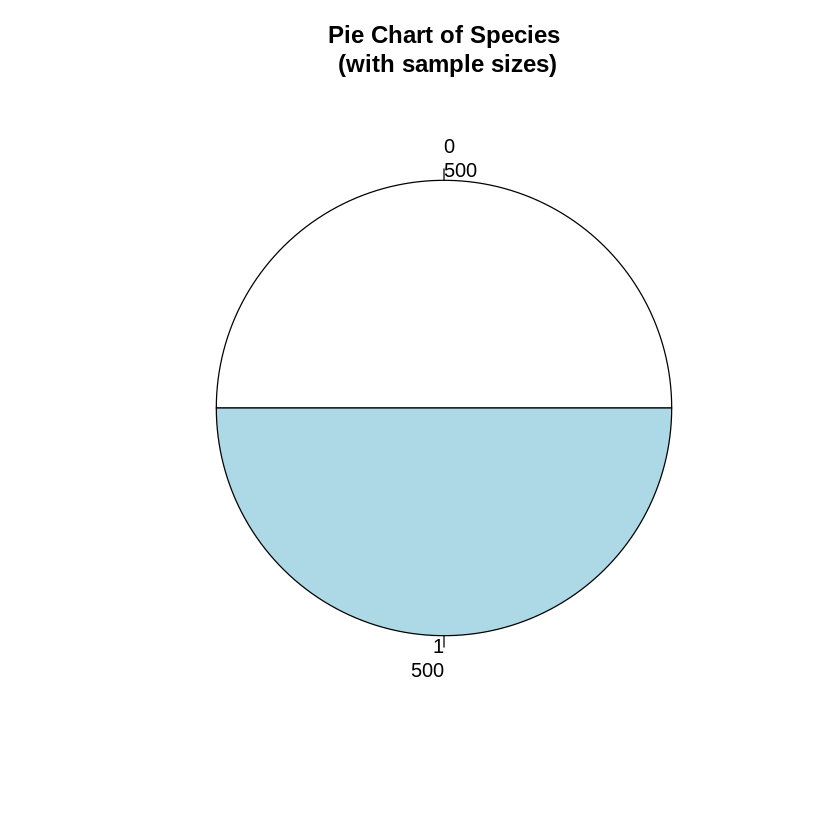

In [ ]:
# Pie Chart from data frame with Appended Sample Sizes
clicked <- table(data$clicked_on_ad)
lbls <- paste(names(clicked), "\n", clicked, sep="")
pie(clicked, labels = lbls,
   main="Pie Chart of Species\n (with sample sizes)")